In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\Acer\OneDrive\Desktop\brain_tumor_dataset\train'
valid_path = r'C:\Users\Acer\OneDrive\Desktop\brain_tumor_dataset\test'

In [3]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob(r'C:\Users\Acer\OneDrive\Desktop\brain_tumor_dataset\train')

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\Acer\OneDrive\Desktop\brain_tumor_dataset\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\Acer\OneDrive\Desktop\brain_tumor_dataset\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 195 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [15]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/20
7/7 [==============================] - 51s 7s/step - loss: 1.0202 - accuracy: 0.5846 - val_loss: 0.7943 - val_accuracy: 0.6552
Epoch 2/20
7/7 [==============================] - 57s 8s/step - loss: 0.6674 - accuracy: 0.6410 - val_loss: 0.7274 - val_accuracy: 0.7069
Epoch 3/20
7/7 [==============================] - 57s 8s/step - loss: 0.6477 - accuracy: 0.7026 - val_loss: 0.5636 - val_accuracy: 0.7586
Epoch 4/20
7/7 [==============================] - 57s 8s/step - loss: 0.4433 - accuracy: 0.7744 - val_loss: 0.6040 - val_accuracy: 0.8276
Epoch 5/20
7/7 [==============================] - 57s 8s/step - loss: 0.4257 - accuracy: 0.7795 - val_loss: 0.3883 - val_accuracy: 0.8448
Epoch 6/20
7/7 [==============================] - 57s 8s/step - loss: 0.3526 - accuracy: 0.8359 - val_loss: 0.5563 - val_accuracy: 0.8103
Epoch 7/20
7/7 [==============================] - 70s 10s/step - loss: 0.4126 - accuracy: 0.8051 - val_loss: 0.2825 - val_accuracy: 0.7931
Epoch 8/20
7/7 [================

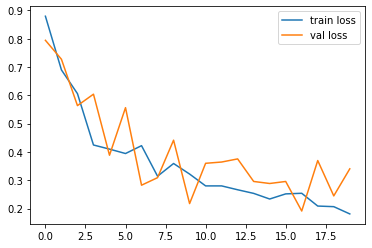

<Figure size 432x288 with 0 Axes>

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

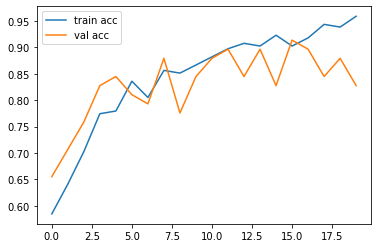

<Figure size 432x288 with 0 Axes>

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
import tensorflow as tf

from keras.models import load_model

model.save('braintumor_vgg19.h5')

In [31]:
import numpy as np
from keras.preprocessing import image

from tkinter import *
from PIL import ImageTk, Image
from tkinter import filedialog
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import os
from keras.models import load_model
classifier = load_model('braintumor_vgg19.h5')
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
root = Tk()
root.geometry("550x300+300+150")
root.resizable(width=True, height=True)

def openfn():
    filename = filedialog.askopenfilename(title='open')
    return filename
def open_img():
    x = openfn()
    test_image = image.load_img(x, target_size = (224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    #a=decode_predictions(test_image, top=1)
    c=result.argmax(-1)
    print(result)
    print(c[0])
    index=['yes','no']
    label = Label(root, text="Prediction : "+index[c[0]])
    label.pack()
    img = Image.open(x)
    img = img.resize((224, 224), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    panel = Label(root, image=img)
    panel.image = img
    panel.pack()

btn = Button(root, text='open', command=open_img).pack()

root.mainloop()

[[0.]]
0
